In [ ]:
# https://pyronear.org/pyro-risks/overview/datasets/NASA-FIRMS_ACTIVE-FIRE_VIIRS.html

In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd

sns.set_style('whitegrid') 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Concatenating all datasets into 1
df1 = pd.read_csv('Datasets/MODIS_SP_DF1.csv')
df2 = pd.read_csv('Datasets/VIIRS_SNPP_SP_DF2.csv')
df3 = pd.read_csv('Datasets/MODIS_SP_DF2.csv')

In [9]:
df1.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [8]:
df2 = df2.rename(columns={'bright_ti4': 'brightness', 'bright_ti5': 'bright_t31'})
df2.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [10]:
df3.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [11]:
final_df = pd.concat([df1,df2,df3],ignore_index=True)

In [12]:
final_df

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0         -18.6804   145.5470       317.3   2.9    1.6  2000-11-01        16   
1         -18.4459   144.8904       324.6   3.2    1.7  2000-11-01        16   
2         -18.4401   144.8603       317.7   3.3    1.7  2000-11-01        16   
3         -18.4005   144.9007       318.8   3.2    1.7  2000-11-01        16   
4         -17.0518   143.8872       322.1   4.1    1.9  2000-11-01        16   
...            ...        ...         ...   ...    ...         ...       ...   
12105617  -23.0698   144.1217       306.5   1.4    1.2  2024-01-21      1626   
12105618  -21.6129   116.3878       315.2   1.0    1.0  2024-01-21      1804   
12105619  -21.6115   116.3781       307.1   1.0    1.0  2024-01-21      1804   
12105620  -34.9101   116.3435       301.5   1.3    1.1  2024-01-21      1808   
12105621  -34.9074   116.3384       305.6   1.3    1.1  2024-01-21      1808   

         satellite instrument confidence  version  bright_t31   frp daynight  \
0            Terra      MODIS         54     6.03       299.4  32.8        D   
1            Terra      MODIS         74     6.03       303.1  77.4        D   
2            Terra      MODIS         61     6.03       303.2  38.5        D   
3            Terra      MODIS         64     6.03       301.5  42.6        D   
4            Terra      MODIS         31     6.03       298.9  72.3        D   
...            ...        ...        ...      ...         ...   ...      ...   
12105617      Aqua      MODIS         61    61.03       295.9   7.8        N   
12105618      Aqua      MODIS         90    61.03       297.0   9.7        N   
12105619      Aqua      MODIS         68    61.03       296.7   3.7        N   
12105620      Aqua      MODIS         19    61.03       285.3   8.2        N   
12105621      Aqua      MODIS         18    61.03       286.2  11.4        N   

          type  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
12105617     0  
12105618     0  
12105619     0  
12105620     0  
12105621     0  

[12105622 rows x 15 columns]

In [16]:
final_df.describe()

latitude     longitude    brightness          scan         track  \
count  1.210562e+07  1.210562e+07  1.210562e+07  1.210562e+07  1.210562e+07   
mean  -2.023332e+01  1.346891e+02  3.337769e+02  9.142085e-01  7.660196e-01   
std    6.866176e+00  9.634424e+00  2.081605e+01  7.916361e-01  4.024843e-01   
min   -5.466900e+01  1.126964e+02  2.080000e+02  3.200000e-01  3.600000e-01   
25%   -2.450756e+01  1.273325e+02  3.176000e+02  4.200000e-01  4.200000e-01   
50%   -1.826439e+01  1.330795e+02  3.348000e+02  5.300000e-01  6.000000e-01   
75%   -1.500322e+01  1.429743e+02  3.466500e+02  1.100000e+00  1.100000e+00   
max   -9.133000e+00  1.679997e+02  5.088000e+02  4.800000e+00  2.000000e+00   

           acq_time       version    bright_t31           frp          type  
count  1.210562e+07  1.210562e+07  1.210562e+07  1.210562e+07  1.210562e+07  
mean   7.649485e+02  5.347523e+00  3.012865e+02  3.204837e+01  2.613893e-02  
std    5.602756e+02  1.059383e+01  1.146290e+01  9.986862e+01  2.433397e-01  
min    0.000000e+00  2.000000e+00  0.000000e+00 -2.990000e+01  0.000000e+00  
25%    4.100000e+02  2.000000e+00  2.929400e+02  3.970000e+00  0.000000e+00  
50%    5.060000e+02  2.000000e+00  3.012700e+02  9.740000e+00  0.000000e+00  
75%    1.442000e+03  6.030000e+00  3.085100e+02  2.630000e+01  0.000000e+00  
max    2.359000e+03  6.103000e+01  4.001000e+02  1.285400e+04  3.000000e+00

In [18]:
final_df.dtypes

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
dtype: object

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12105622 entries, 0 to 12105621
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   acq_time    int64  
 7   satellite   object 
 8   instrument  object 
 9   confidence  object 
 10  version     float64
 11  bright_t31  float64
 12  frp         float64
 13  daynight    object 
 14  type        int64  
dtypes: float64(8), int64(2), object(5)
memory usage: 1.4+ GB


In [22]:
final_df.shape

(12105622, 15)

In [24]:
final_df.describe(include='O')

acq_date satellite instrument confidence  daynight
count     12105622  12105622   12105622   12105622  12105622
unique        8450         3          2        104         2
top     2012-10-22         N      VIIRS          n         D
freq         45637   7644860    7644860    6215525   8344820

In [25]:
final_df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [27]:
final_df[final_df.duplicated(keep='first')]

Empty DataFrame
Columns: [latitude, longitude, brightness, scan, track, acq_date, acq_time, satellite, instrument, confidence, version, bright_t31, frp, daynight, type]
Index: []

In [28]:
# Univariate Analysis

In [30]:
non_numeric_conf = len( final_df[(final_df['confidence']=='l') | (final_df['confidence']=='n') | (final_df['confidence']=='h')])
print("Percentage of rows where confidence is non-numeric is :", ( non_numeric_conf / len(final_df)) * 100)

Percentage of rows where confidence is non-numeric is : 63.15131927958761


In [31]:
# 63% of the records for 'Confidence' are categorical, while the rest are numeric
def standardize_confidence(value):
    try:
        value=float(value)
        if(value<=33.3):
            return 'l'
        elif(value>33.3 and value<66.6):
            return 'n'
        elif(value>=66.6):
            return 'h'
    except:
        return value
final_df['confidence'] = final_df['confidence'].astype(str)     
final_df['confidence'] = final_df['confidence'].apply(standardize_confidence)

In [32]:
final_df['confidence']

0           n
1           h
2           n
3           n
4           l
           ..
12105617    n
12105618    h
12105619    h
12105620    l
12105621    l
Name: confidence, Length: 12105622, dtype: object

In [40]:
from cartopy import crs as ccrs
from geodatasets import get_path

In [44]:
final_df['acq_date'] = pd.to_datetime(final_df['acq_date'])


world = gpd.read_file(get_path('naturalearth.land'))


In [72]:
australia_bbox = {
    'lat_min': -44.0,
    'lat_max': -10.0,
    'lon_min': 112.0,
    'lon_max': 154.0
}
plt.ioff()

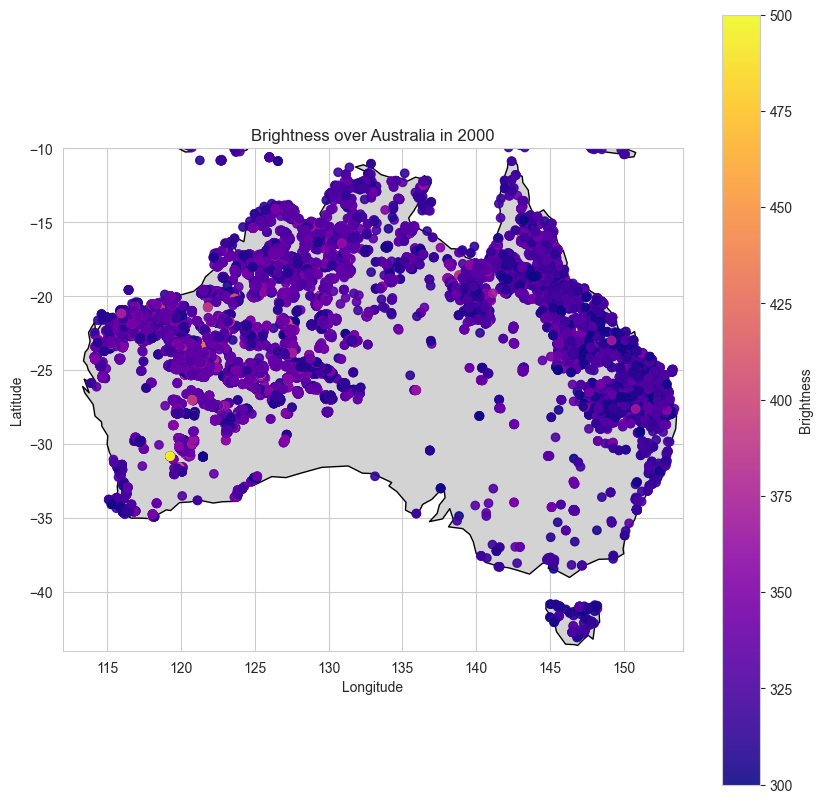

<Figure size 640x480 with 0 Axes>

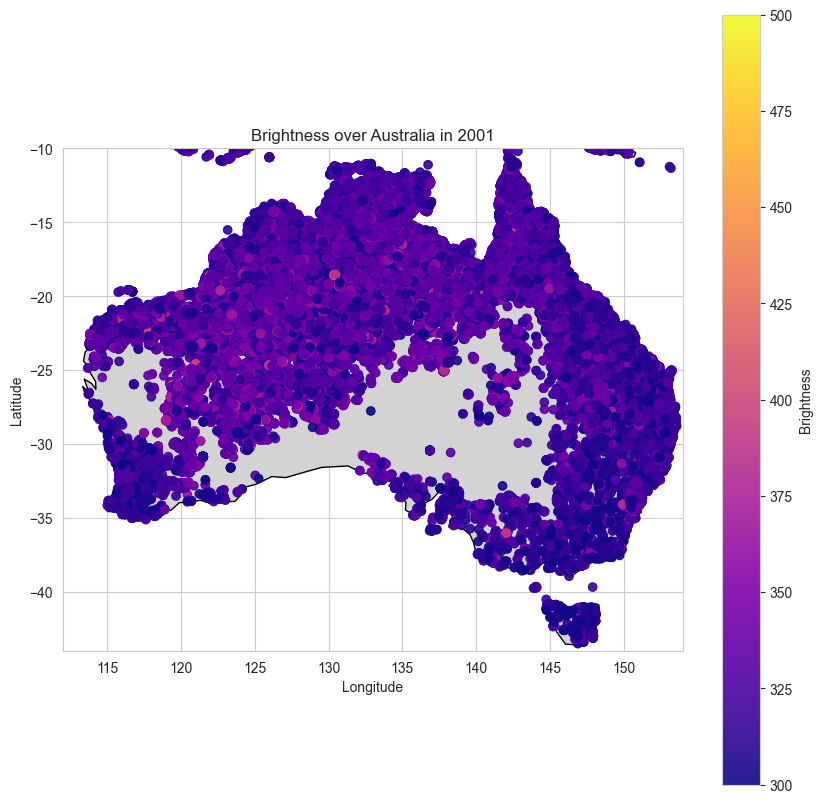

<Figure size 640x480 with 0 Axes>

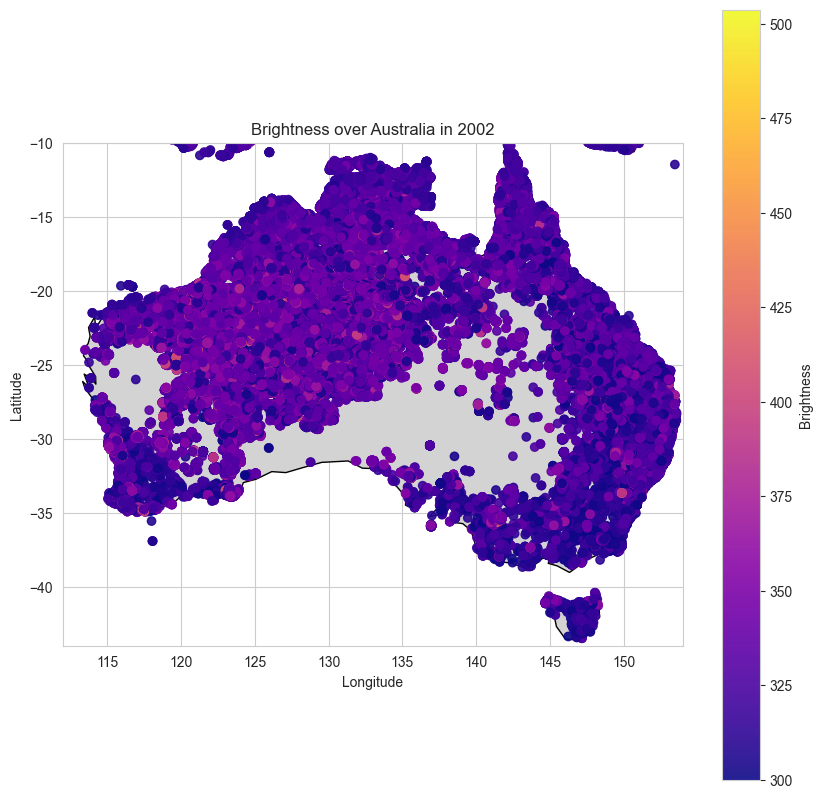

<Figure size 640x480 with 0 Axes>

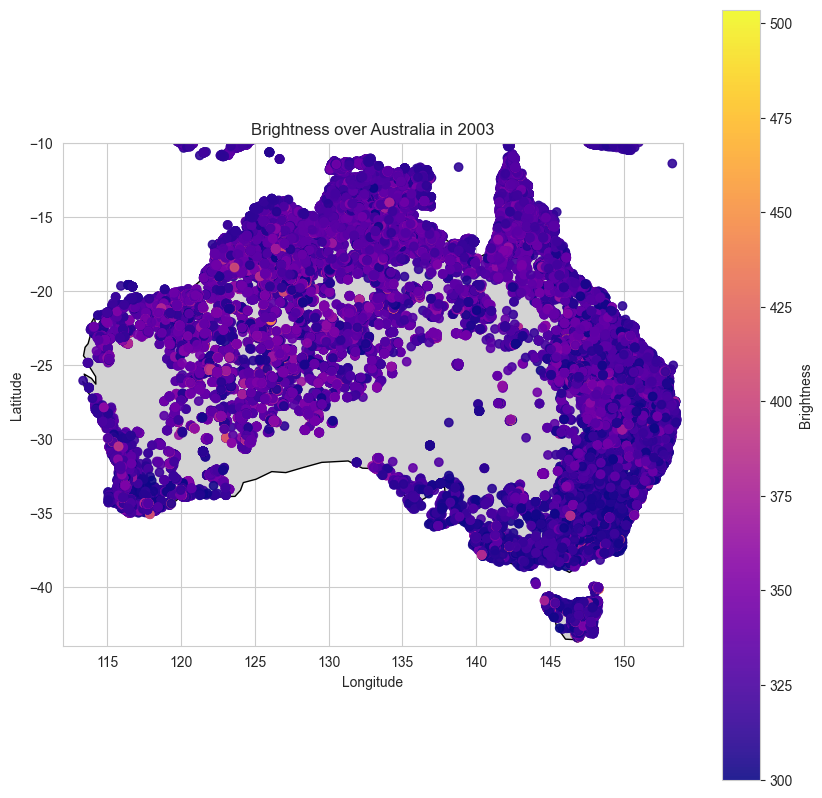

<Figure size 640x480 with 0 Axes>

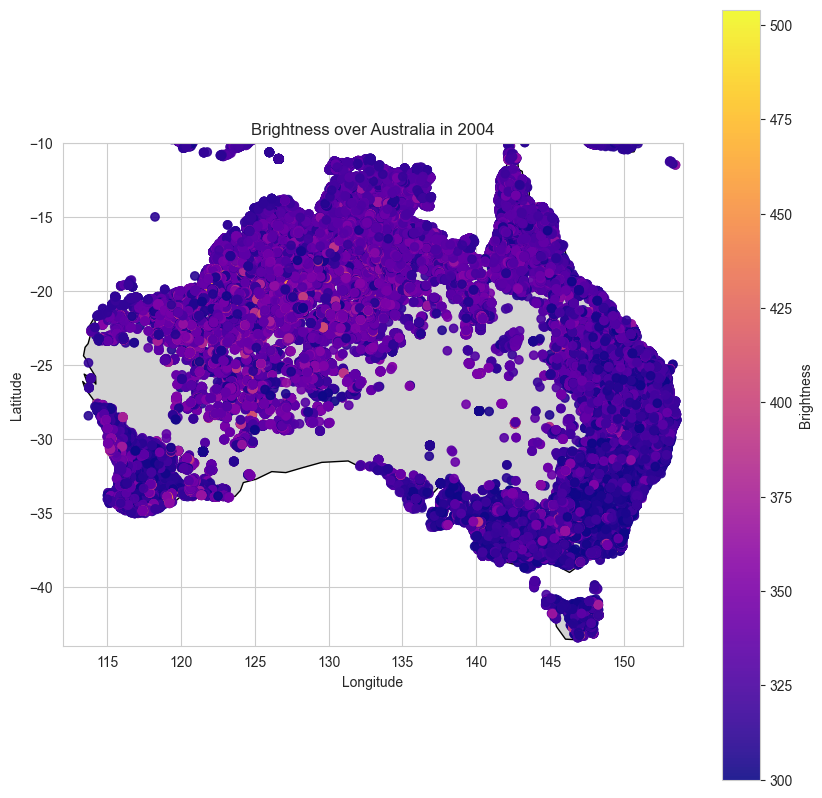

<Figure size 640x480 with 0 Axes>

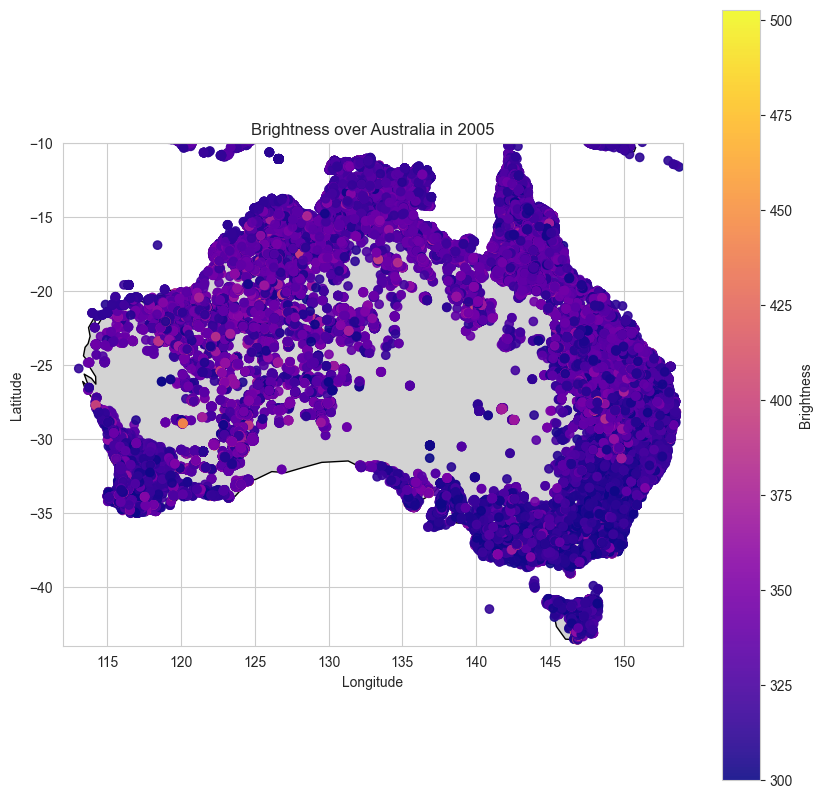

<Figure size 640x480 with 0 Axes>

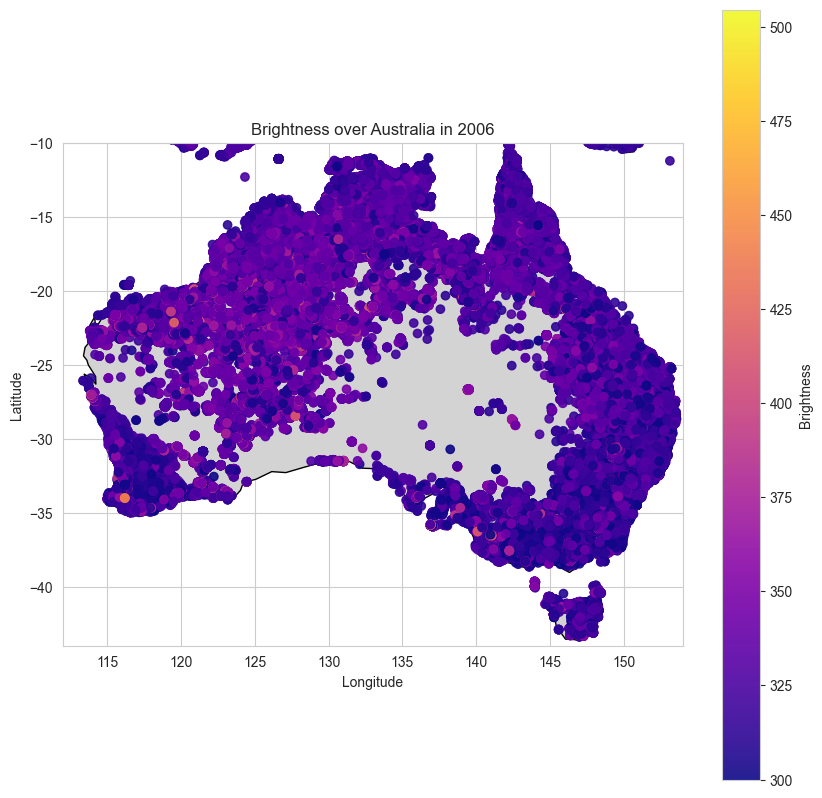

<Figure size 640x480 with 0 Axes>

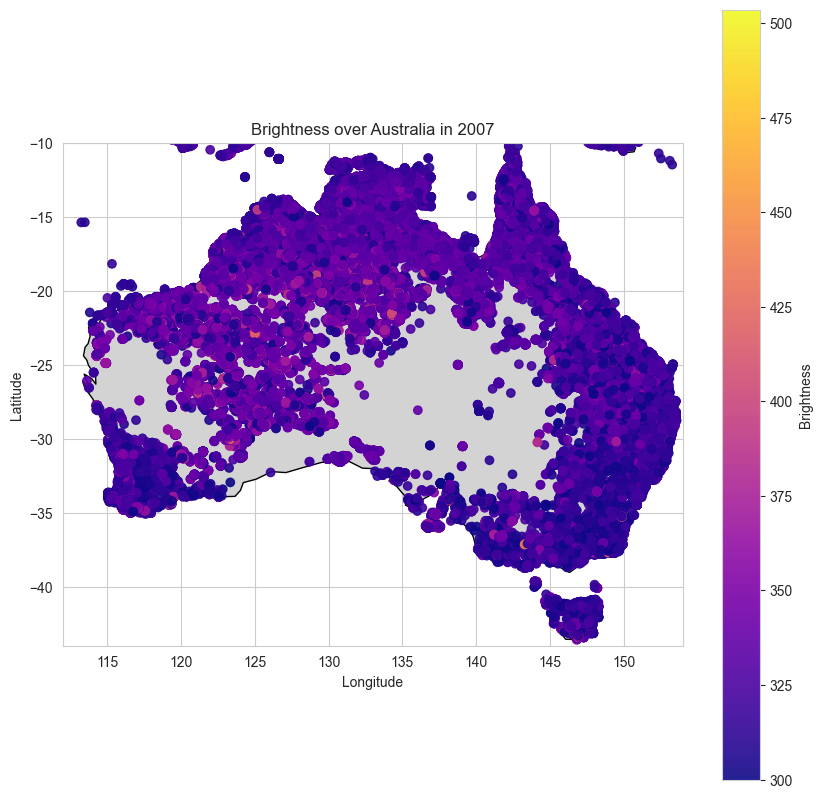

<Figure size 640x480 with 0 Axes>

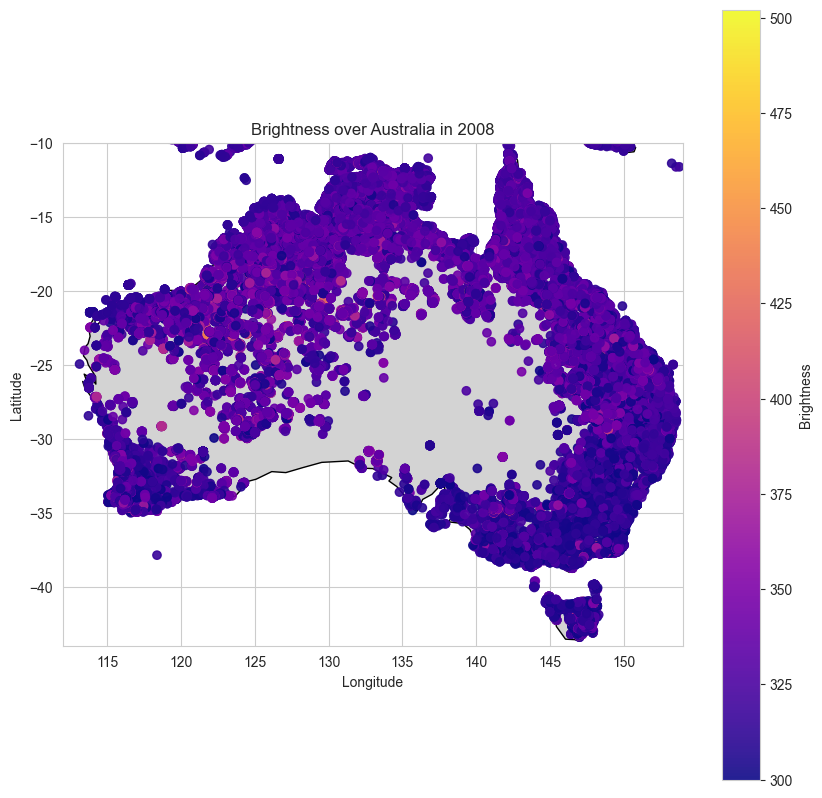

<Figure size 640x480 with 0 Axes>

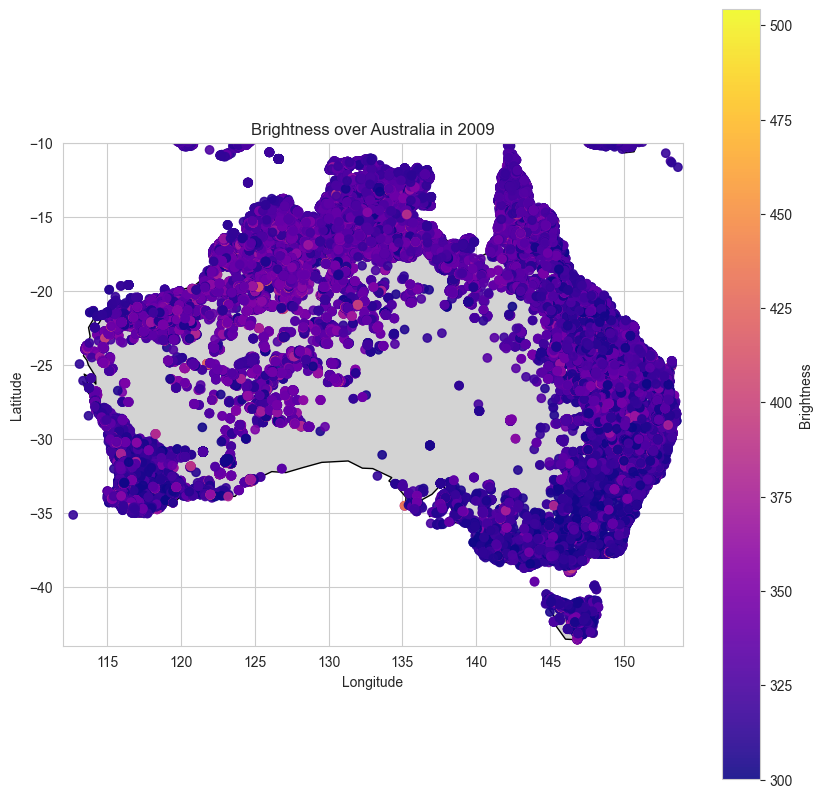

<Figure size 640x480 with 0 Axes>

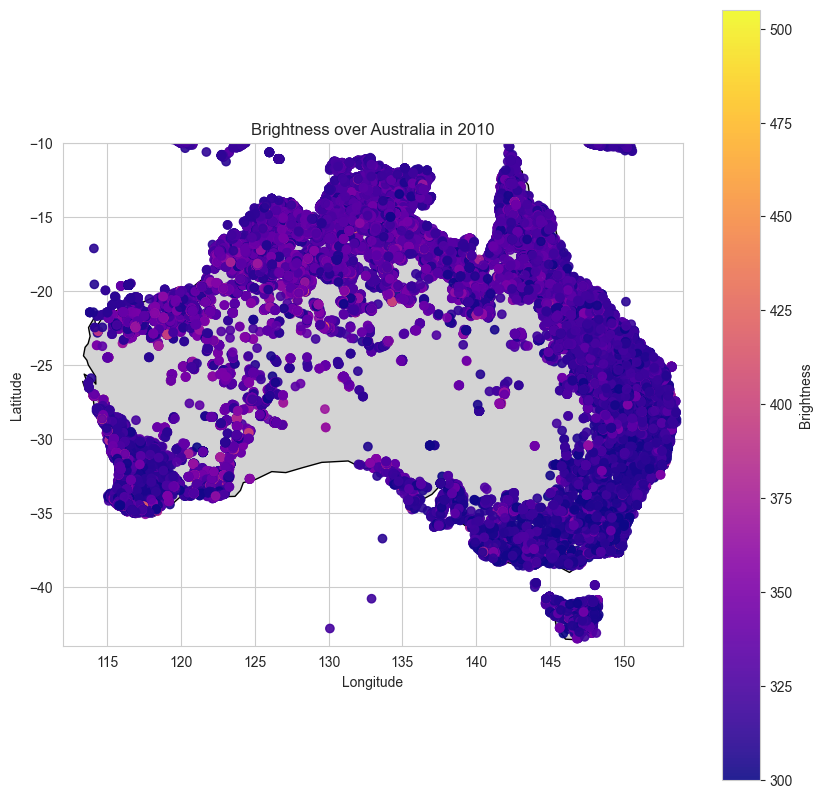

<Figure size 640x480 with 0 Axes>

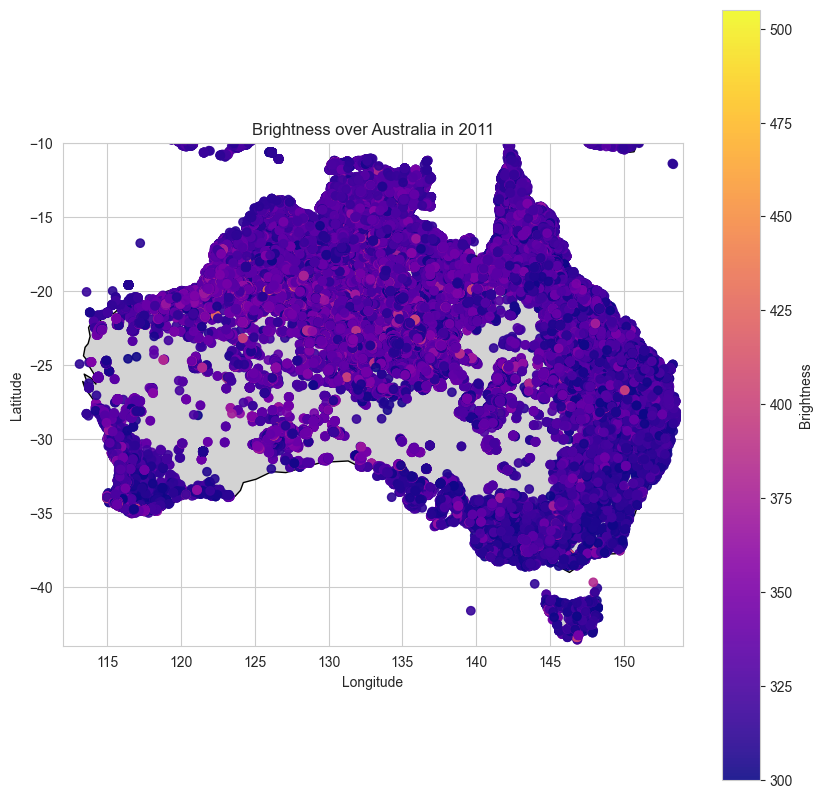

<Figure size 640x480 with 0 Axes>

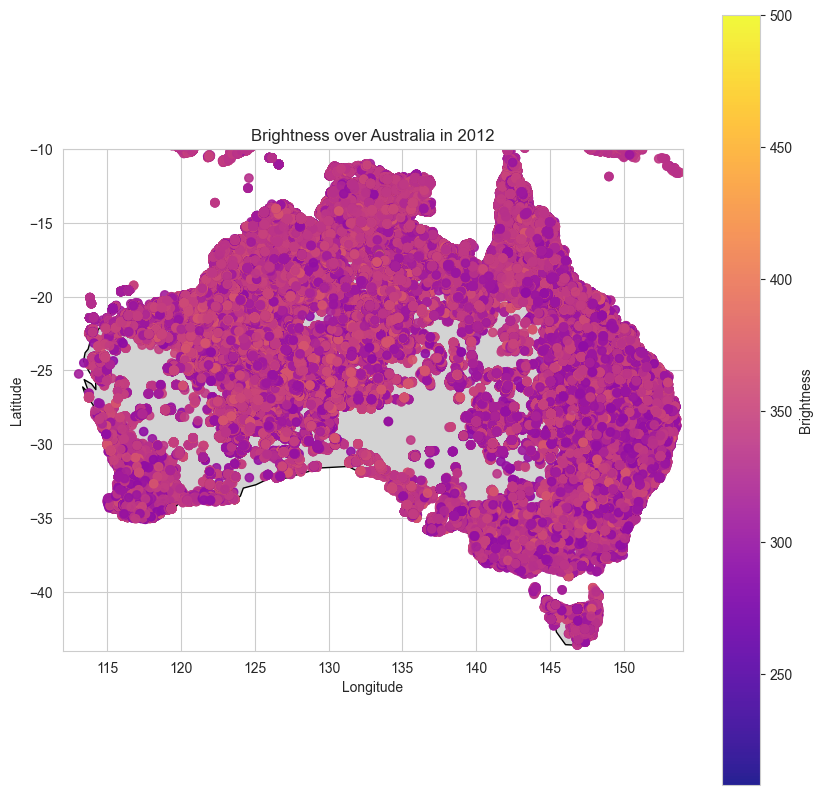

<Figure size 640x480 with 0 Axes>

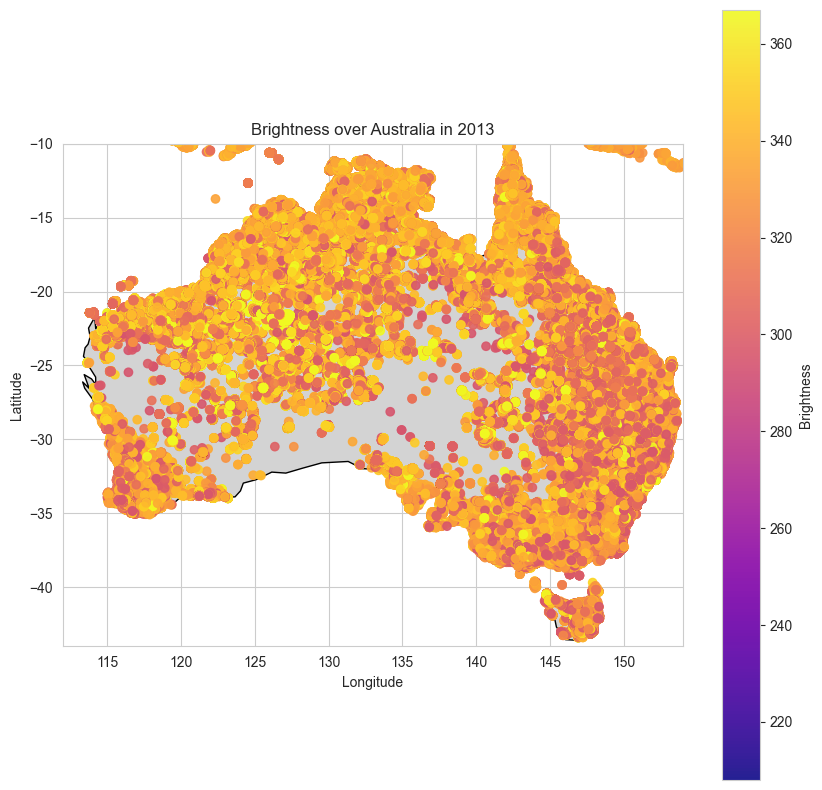

<Figure size 640x480 with 0 Axes>

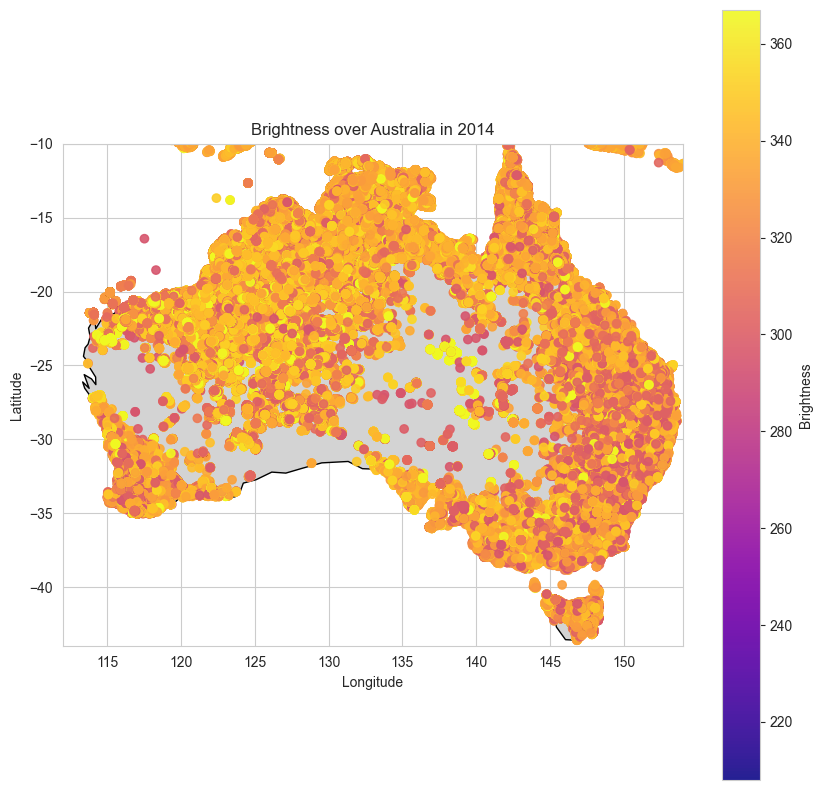

<Figure size 640x480 with 0 Axes>

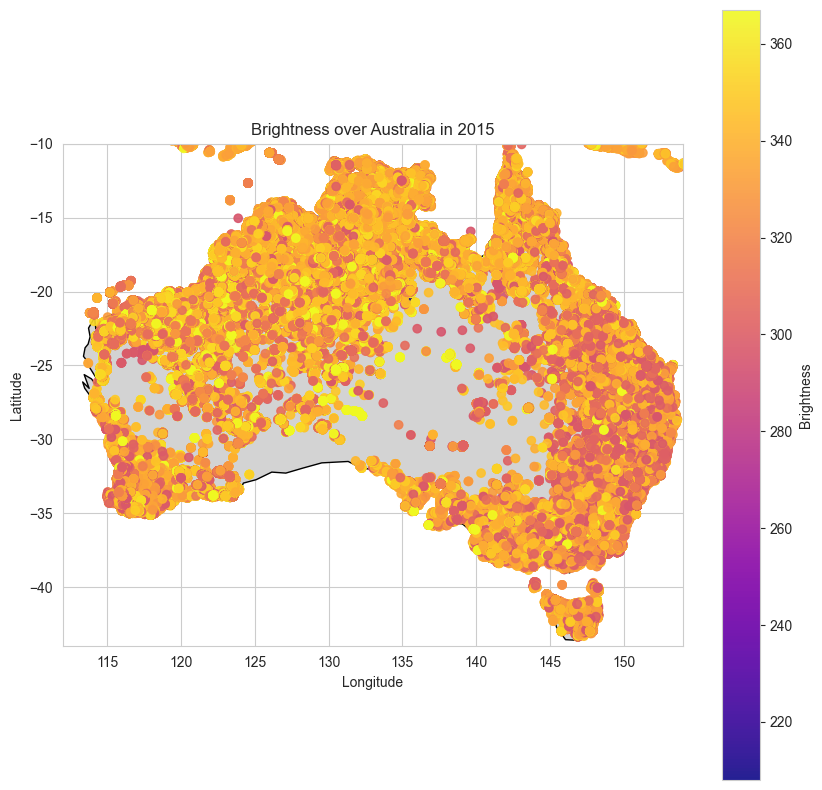

<Figure size 640x480 with 0 Axes>

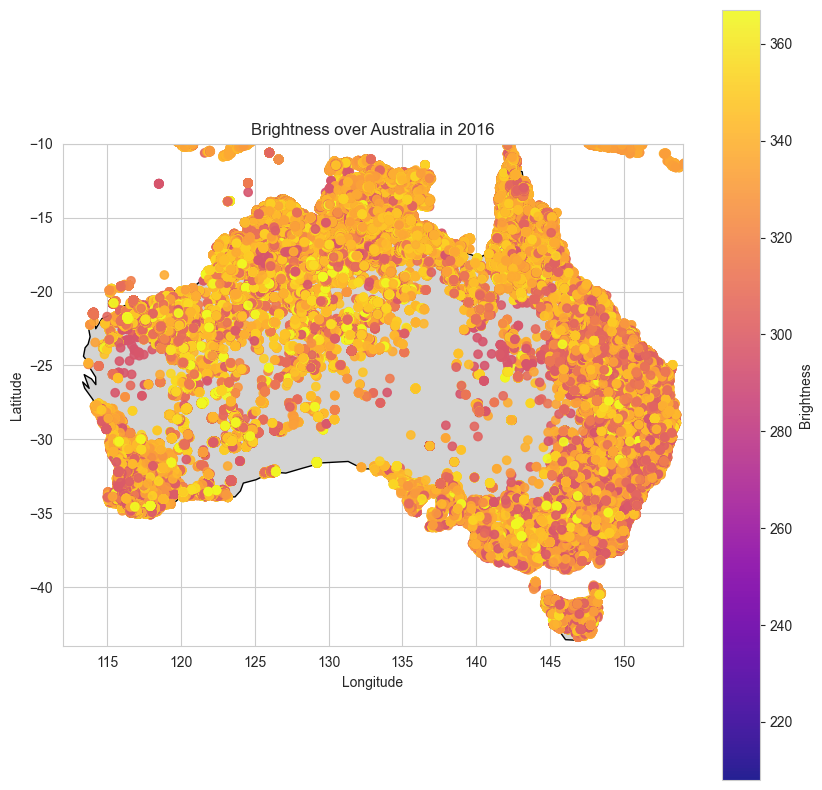

<Figure size 640x480 with 0 Axes>

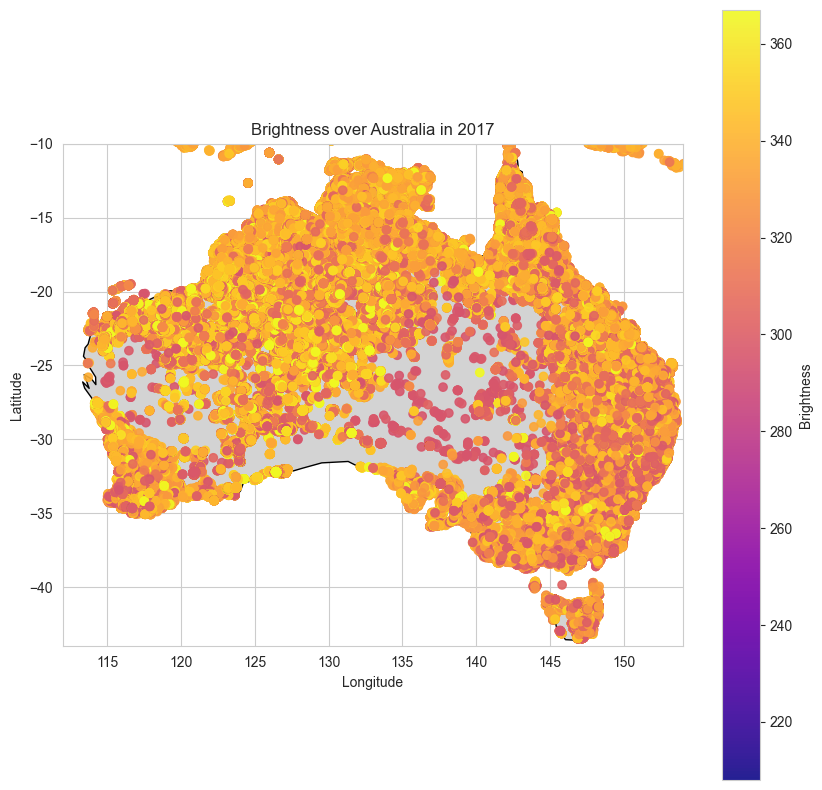

<Figure size 640x480 with 0 Axes>

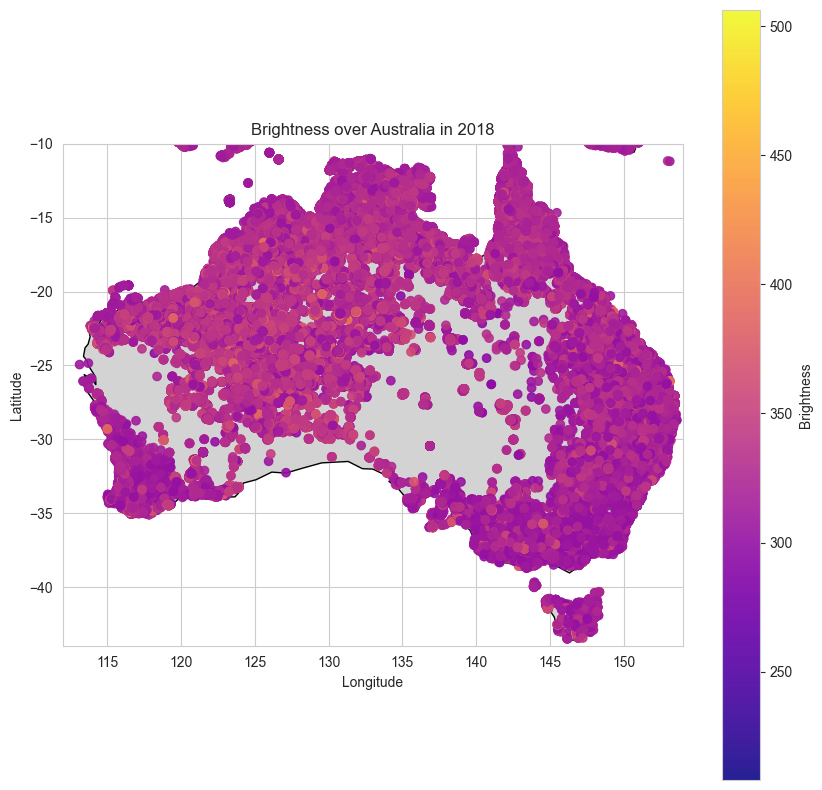

<Figure size 640x480 with 0 Axes>

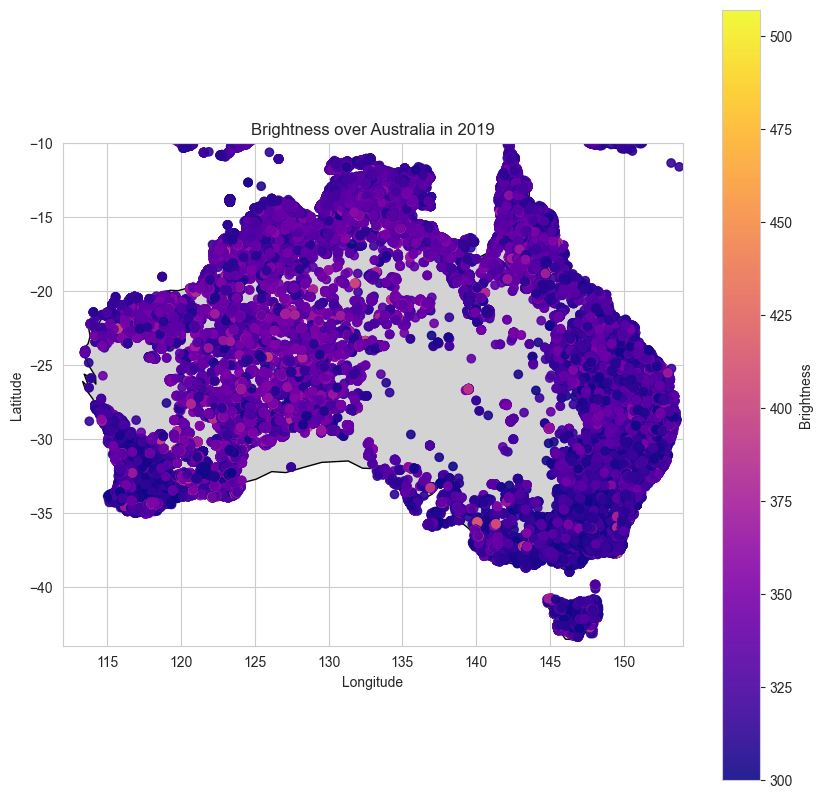

<Figure size 640x480 with 0 Axes>

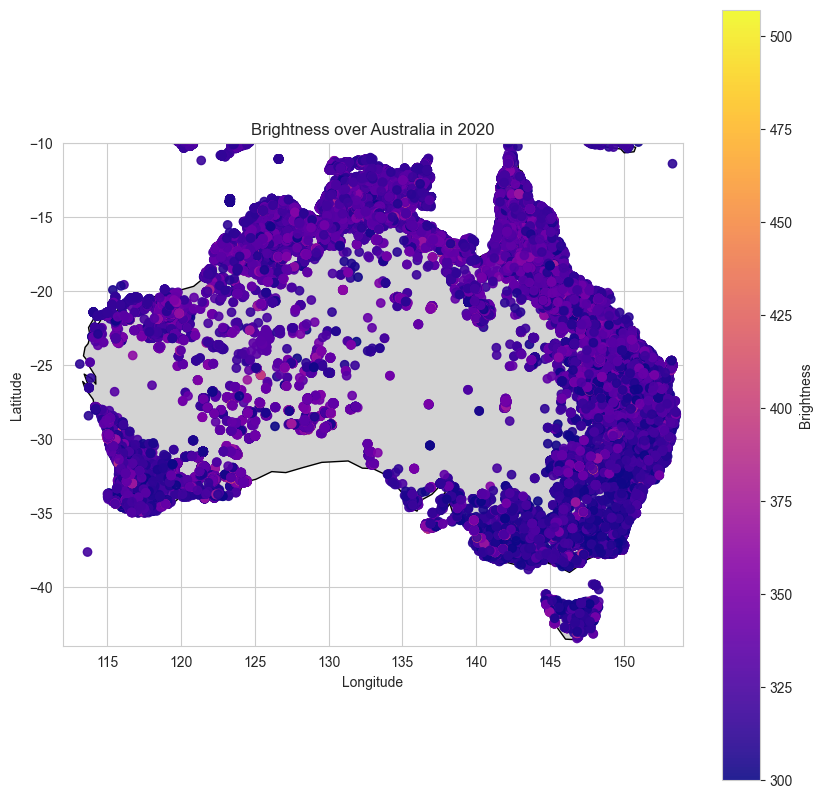

<Figure size 640x480 with 0 Axes>

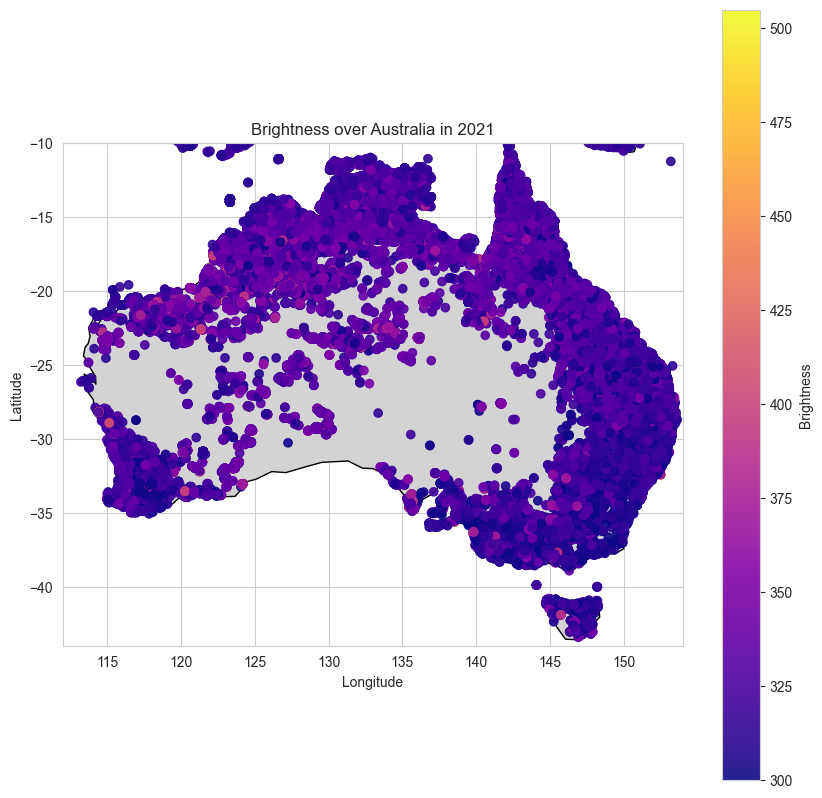

<Figure size 640x480 with 0 Axes>

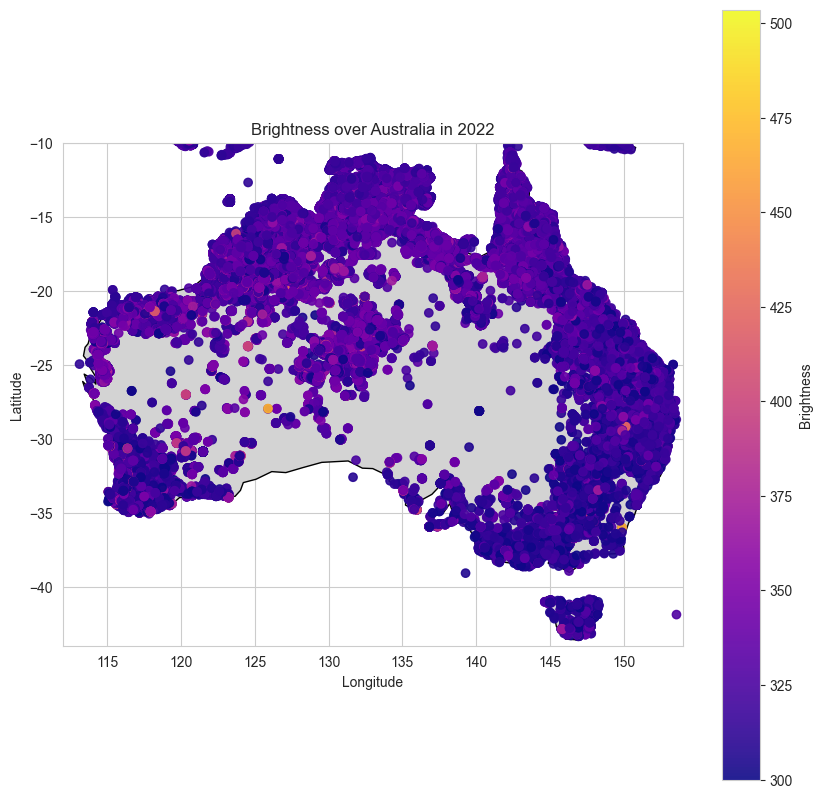

<Figure size 640x480 with 0 Axes>

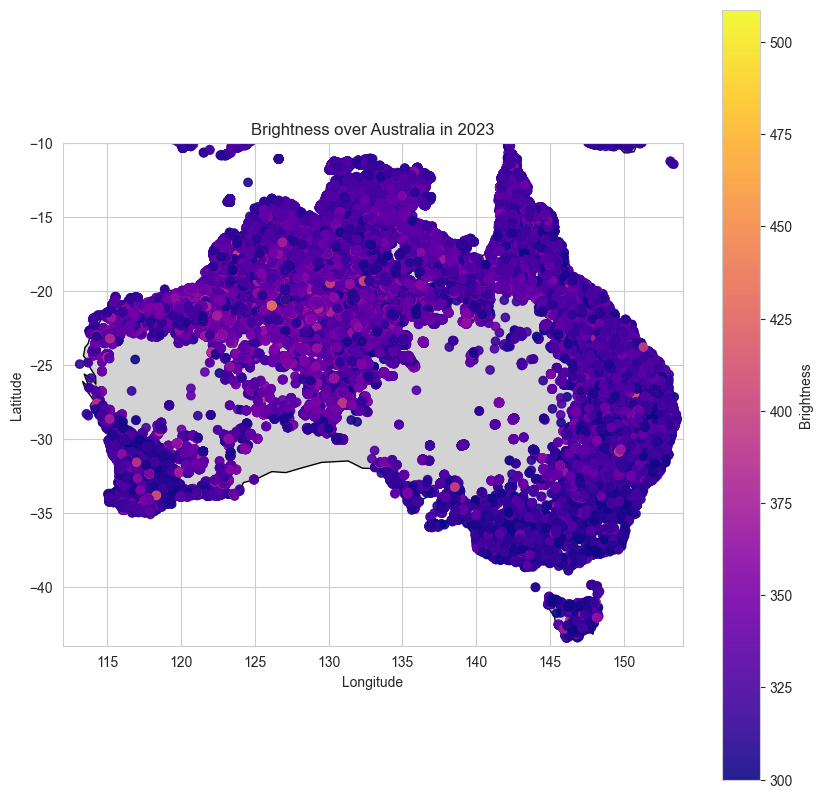

<Figure size 640x480 with 0 Axes>

In [73]:
for year in range(2000, 2024):
    # Filter the dataframe for the current year
    df_year = final_df[final_df['acq_date'].dt.year == year]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax = world.plot(figsize=(10, 10), color="lightgrey", edgecolor="black", ax=ax)
    
    ax.set_xlim(australia_bbox['lon_min'], australia_bbox['lon_max'])
    ax.set_ylim(australia_bbox['lat_min'], australia_bbox['lat_max'])
    
    scatter = ax.scatter(df_year['longitude'], df_year['latitude'],
                         c=df_year['brightness'], cmap='plasma', alpha=0.9)
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Brightness')
    
    ax.set_title(f'Brightness over Australia in {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    
    plt.show()
    plt.clf()
    
plt.ion()

In [ ]:
# Yearly Data

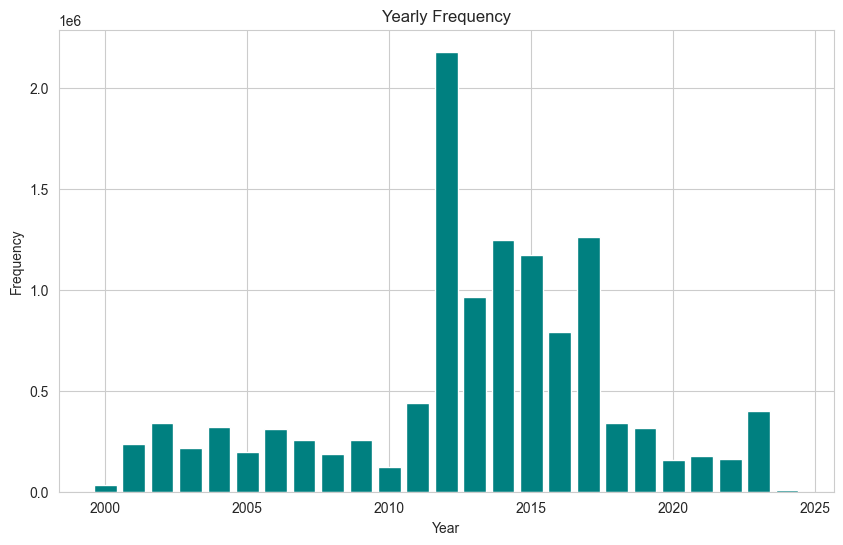

In [98]:
final_df['year'] = final_df['acq_date'].dt.year

yearly_frequency = final_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_frequency.index, yearly_frequency.values, color='teal')  

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Frequency')
plt.grid(True)

plt.show()

In [81]:
final_df['year'].describe().round()

count    12105622.0
mean         2013.0
std             5.0
min          2000.0
25%          2012.0
50%          2013.0
75%          2016.0
max          2024.0
Name: year, dtype: float64

In [82]:
# Monthly frequency

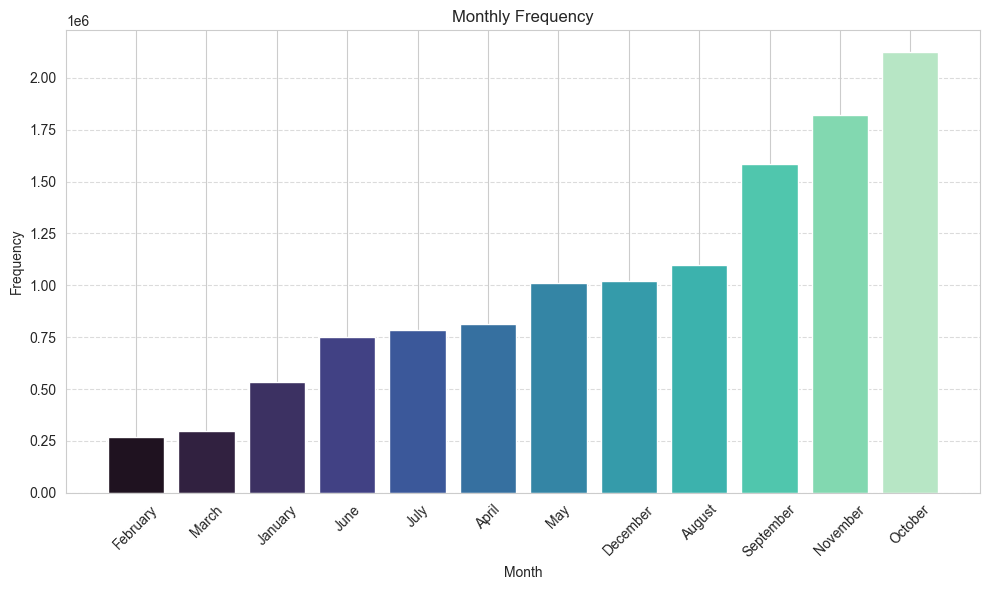

In [97]:
final_df['month'] = final_df['acq_date'].dt.month  

monthly_frequency = final_df['month'].value_counts(ascending=True)

month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

palette = sns.color_palette("mako", len(monthly_frequency)) 
plt.figure(figsize=(10, 6))
bars = plt.bar([month_labels[i-1] for i in monthly_frequency.index], monthly_frequency.values, color=palette)

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Monthly Frequency')

plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()